# Text Summarisation using LLM

## Import dataset from kaggle

Download dataset from kaggle

In [52]:
import os
import json

from zipfile import ZipFile
import pandas as pd

In [53]:
# kaggle_dictionary = json.load(open("kaggle.json"))

In [54]:
# kaggle_dictionary = json.load(open("kaggle.json"))
# os.environ['KAGGLE_USERNAME'] = kaggle_dictionary['username']
# os.environ['KAGGLE_KEY'] = kaggle_dictionary['key']

In [55]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("nileshmalode1/samsum-dataset-text-summarization")

# print("Path to dataset files:", path)

In [56]:
# !kaggle datasets download -d nileshmalode1/samsum-dataset-text-summarization

In [57]:
ls

 Volume in drive D is Local Disk
 Volume Serial Number is 4656-BC59

 Directory of d:\internship\python\Projects\LLM\Text Summarization

03/19/2025  05:22 PM    <DIR>          .
03/17/2025  09:50 AM    <DIR>          ..
01/05/2025  12:17 PM                69 kaggle.json
03/18/2025  03:57 PM           530,165 samsum-test.csv
03/18/2025  03:57 PM         9,401,418 samsum-train.csv
03/18/2025  03:57 PM           512,131 samsum-validation.csv
03/19/2025  05:23 PM           340,316 Text_Summarisation_LLM.ipynb
               5 File(s)     10,784,099 bytes
               2 Dir(s)  66,605,604,864 bytes free


In [58]:
# import patoolib
# patoolib.extract_archive('samsum-dataset-text-summarization.zip')

In [59]:
ls

 Volume in drive D is Local Disk
 Volume Serial Number is 4656-BC59

 Directory of d:\internship\python\Projects\LLM\Text Summarization

03/19/2025  05:22 PM    <DIR>          .
03/17/2025  09:50 AM    <DIR>          ..
01/05/2025  12:17 PM                69 kaggle.json
03/18/2025  03:57 PM           530,165 samsum-test.csv
03/18/2025  03:57 PM         9,401,418 samsum-train.csv
03/18/2025  03:57 PM           512,131 samsum-validation.csv
03/19/2025  05:23 PM           340,316 Text_Summarisation_LLM.ipynb
               5 File(s)     10,784,099 bytes
               2 Dir(s)  66,605,604,864 bytes free


## Data Exploration
As we have successfully downloaded the dataset from kaggle, lets explore and analyse all three datasets we have available.

In [60]:
train = pd.read_csv("samsum-train.csv")
test = pd.read_csv("samsum-test.csv")
val = pd.read_csv("samsum-validation.csv")

#### Training dataset

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14732 entries, 0 to 14731
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        14732 non-null  object
 1   dialogue  14731 non-null  object
 2   summary   14732 non-null  object
dtypes: object(3)
memory usage: 345.4+ KB


In [62]:
train.describe()

,id,dialogue,summary
count,14732,14731,14732
unique,14732,14264,14730
top,13818513,"Jimmy: Hey, guess what? My car's completely ka...",Seth's pet Oreo that he got when he was 10 is ...
freq,1,4,2


In [63]:
train.shape

(14732, 3)

In [64]:
train.size

44196

In [65]:
train = train.iloc[0:7000]

In [66]:
train.shape

(7000, 3)

In [67]:
train.isna().sum()

id          0
dialogue    1
summary     0
dtype: int64

In [68]:
train.dropna(inplace=True)

In [69]:
train.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\r\...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\r\nKim: Bad mood tbh, I wa...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\r\nSam:...,"Sam is confused, because he overheard Rick com..."


In [70]:
train.tail()

,id,dialogue,summary
6995,13828301,Tom: i took Josh to d doc\r\nTom: u were right...,"Tom took Josh to the doctor and, as Riley said..."
6996,13728591,Bart: <file_photo>\r\nDean: who is that foxy l...,Bart has sent Dean a picture of Mary from thei...
6997,13730829,Daniel: <file_photo>\r\nLizzy: What about the ...,Daniel's new dog does not have a name yet. Dan...
6998,13681980,"Todd: Hey, get your shit together and come on ...","Todd, Dan and Tate will play a gig at The Rivo..."
6999,13730127,Noah: I'm going to visit my grandma\r\nLeo: Br...,Noah visits his grandma. Leo reminds him about...


#### Test dataset

In [71]:
test.describe()

,id,dialogue,summary
count,819,819,819
unique,819,819,819
top,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
freq,1,1,1


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        819 non-null    object
 1   dialogue  819 non-null    object
 2   summary   819 non-null    object
dtypes: object(3)
memory usage: 19.3+ KB


In [73]:
test.isna().sum()

id          0
dialogue    0
summary     0
dtype: int64

In [74]:
test.shape

(819, 3)

In [75]:
test = test.iloc[0:400]

In [76]:
test.head()

,id,dialogue,summary
0,13862856,"Hannah: Hey, do you have Betty's number?\nAman...",Hannah needs Betty's number but Amanda doesn't...
1,13729565,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,Eric and Rob are going to watch a stand-up on ...
2,13680171,"Lenny: Babe, can you help me with something?\r...",Lenny can't decide which trousers to buy. Bob ...
3,13729438,"Will: hey babe, what do you want for dinner to...",Emma will be home soon and she will let Will k...
4,13828600,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...",Jane is in Warsaw. Ollie and Jane has a party....


In [77]:
test.tail()

,id,dialogue,summary
395,13810336,"Erin: hey Zach\r\nErin: look at this babe, I'v...",Erin has just baked something that Zachary fin...
396,13681084,"Joseph: U there, mate?\r\nAlbert: Yeah\r\nJose...",Joseph was happy with two of the three hotel j...
397,13680347,Sue: Hi Graham when you have a minute can you ...,Sue wants Graham to give her some dates for we...
398,13716807,Brett: So what do u do there? Drive a tank all...,Brett's cousin met his wife while playing a ga...
399,13682221,"Rael: Gosh, I fucking hate my job!\r\nZach: Oo...",Rael finds the atmosphere at her workplace to ...


#### Validation dataset

In [78]:
val.describe()

,id,dialogue,summary
count,818,818,818
unique,818,818,818
top,13817023,"A: Hi Tom, are you busy tomorrow’s afternoon?\...",A will go to the animal shelter tomorrow to ge...
freq,1,1,1


In [79]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        818 non-null    object
 1   dialogue  818 non-null    object
 2   summary   818 non-null    object
dtypes: object(3)
memory usage: 19.3+ KB


In [80]:
val.isna().sum()

id          0
dialogue    0
summary     0
dtype: int64

In [81]:
val.shape

(818, 3)

In [82]:
val = val.iloc[0:400]

In [83]:
val.head()

,id,dialogue,summary
0,13817023,"A: Hi Tom, are you busy tomorrow’s afternoon?\...",A will go to the animal shelter tomorrow to ge...
1,13716628,Emma: I’ve just fallen in love with this adven...,Emma and Rob love the advent calendar. Lauren ...
2,13829420,Jackie: Madison is pregnant\r\nJackie: but she...,Madison is pregnant but she doesn't want to ta...
3,13819648,Marla: <file_photo>\r\nMarla: look what I foun...,Marla found a pair of boxers under her bed.
4,13728448,Robert: Hey give me the address of this music ...,Robert wants Fred to send him the address of t...


In [84]:
val.tail()

,id,dialogue,summary
395,13809953,Lucy: Hi. Are the rollerblades still available...,Lucy's buying rollerblades for her niece. They...
396,13680595,"Robin: Dad, can you give me a lift?\r\nMr. Che...",Mr. Cheng will drive Robin to the mall to buy ...
397,13680416,"Mom: don't be late today!\r\nKevin: ok, mom\r\...",Mom wants Kevin to be on time and war a clean ...
398,13681392,Zendaya: I will be home at 8\r\nPhil: ok I wil...,Zendaya will be home at 8. Phil will wait with...
399,13730996,Gina: Morning! :)\r\nDrake: Good morning to yo...,Drake and Basia enjoyed going to a concert yes...


All three datasets looks good. There are no null values in the dataset. The shapes of all three datasets matches each other. The dataset is already splitted for training, testing and validation the model.

## Data Preprocessing


In [85]:
train.drop(["id"], axis=1, inplace=True)
test.drop(["id"], axis=1, inplace=True)
val.drop(["id"], axis=1, inplace=True)

In [86]:
# prompt: Convert text to lowercase
# Remove special characters, extra spaces, and unnecessary punctuation

import re

def preprocess_text(text):
  """Converts text to lowercase, removes special characters, extra spaces, and punctuation.
  """
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
  text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
  return text

train = train.applymap(preprocess_text)
test = test.applymap(preprocess_text)
val = val.applymap(preprocess_text)


C:\Users\Asus\AppData\Local\Temp\ipykernel_14016\3132329162.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train = train.applymap(preprocess_text)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14016\3132329162.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test = test.applymap(preprocess_text)
C:\Users\Asus\AppData\Local\Temp\ipykernel_14016\3132329162.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  val = val.applymap(preprocess_text)


In [87]:
train.head()

,dialogue,summary
0,amanda i baked cookies do you want some jerry ...,amanda baked cookies and will bring jerry some...
1,olivia who are you voting for in this election...,olivia and olivier are voting for liberals in ...
2,tim hi whats up kim bad mood tbh i was going t...,kim may try the pomodoro technique recommended...
3,edward rachel i think im in ove with bella rac...,edward thinks he is in love with bella rachel ...
4,sam hey overheard rick say something sam i don...,sam is confused because he overheard rick comp...


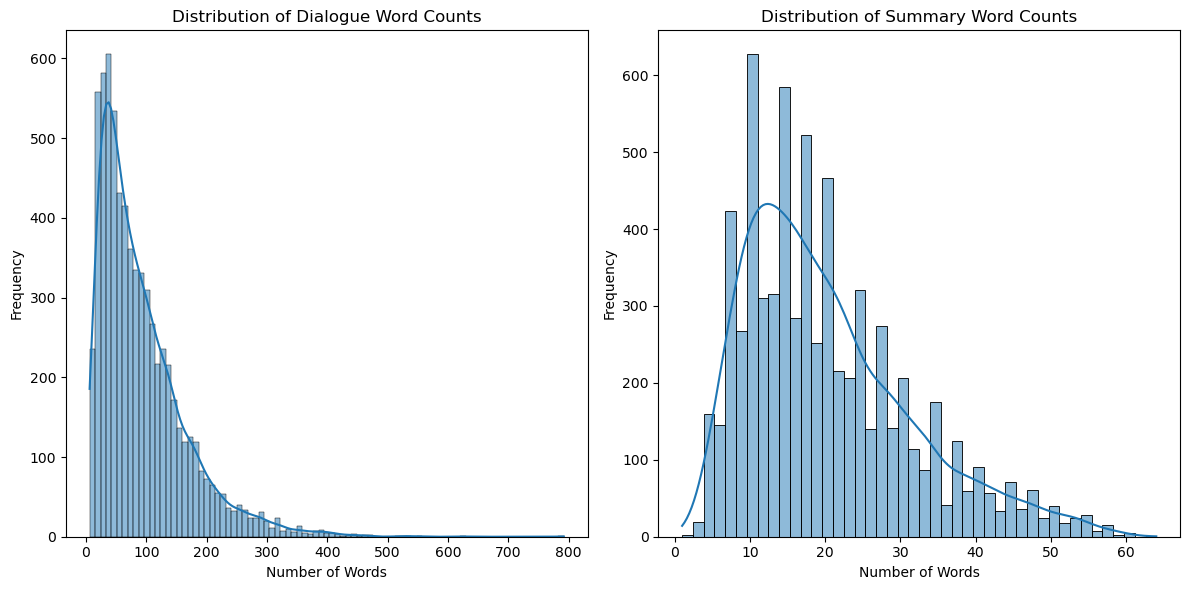

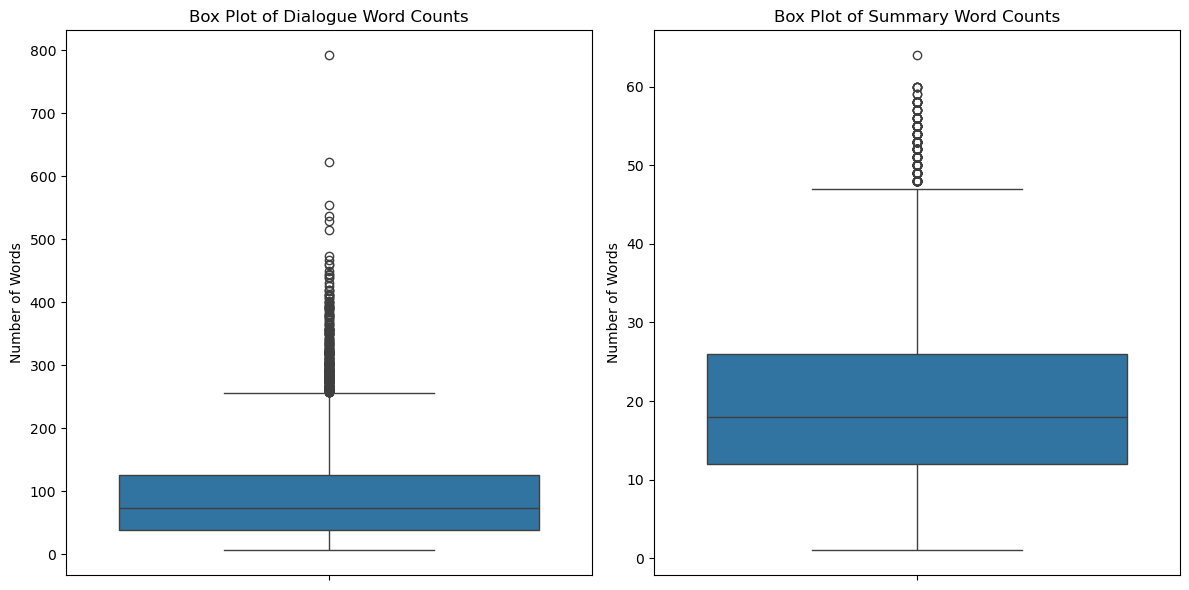

In [88]:
# prompt: plot histogram and box plot showing no of texts in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' DataFrame is already loaded and preprocessed as in your provided code.

# Calculate the number of words in each text
train['dialogue_word_count'] = train['dialogue'].apply(lambda x: len(x.split()))
train['summary_word_count'] = train['summary'].apply(lambda x: len(x.split()))

# Plotting the histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(train['dialogue_word_count'], kde=True)
plt.title('Distribution of Dialogue Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(train['summary_word_count'], kde=True)
plt.title('Distribution of Summary Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plotting the boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=train['dialogue_word_count'])
plt.title('Box Plot of Dialogue Word Counts')
plt.ylabel('Number of Words')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['summary_word_count'])
plt.title('Box Plot of Summary Word Counts')
plt.ylabel('Number of Words')

plt.tight_layout()
plt.show()


In [89]:
# Preprocess dataset (Drop 'id' and format input-output)
train_df = train[['dialogue', 'summary']]
test_df = test[['dialogue', 'summary']]
val_df = val[['dialogue', 'summary']]

In [90]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
from datasets import Dataset

In [91]:
# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
val_dataset = Dataset.from_pandas(val_df)

In [92]:
# Preprocess dataset (Drop 'id' and format input-output)
train_df = train_df[['dialogue', 'summary']]
test_df = test_df[['dialogue', 'summary']]
val_df = val_df[['dialogue', 'summary']]

In [103]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")

# Tokenization function
def preprocess_function(examples):
    model_inputs = tokenizer(examples["dialogue"], max_length=512, truncation=True, padding="max_length")
    labels = tokenizer(examples["summary"], max_length=128, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [104]:
# Apply tokenization
train_tokenized = train_dataset.map(preprocess_function, batched=True)
test_tokenized = test_dataset.map(preprocess_function, batched=True)
val_tokenized = val_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/6999 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

## Load and train the model

In [121]:
# Set the device (replace 'cuda:0' with the appropriate GPU if you have multiple GPUs)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Set the device for PyTorch
torch.cuda.set_device(device)

In [123]:
# Load pretrained T5 model
model = T5ForConditionalGeneration.from_pretrained("google-t5/t5-small")
model = model.to(device)

In [124]:
pip install transformers[torch]

Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install accelerate>=0.26.0

Note: you may need to restart the kernel to use updated packages.


In [125]:
# Set up training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3
)

c:\Users\Asus\anaconda3\envs\myvenv\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [126]:
# Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=val_tokenized
)

In [127]:
torch.cuda.memory_summary(device=None, abbreviated=False)


'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   2324 MiB |   7387 MiB |   2321 GiB |   2319 GiB |\n|       from large pool |   1603 MiB |   6862 MiB |   2299 GiB |   2298 GiB |\n|       from small pool |    720 MiB |    720 MiB |     21 GiB |     20 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         |   2324 MiB |   7387 MiB |   2321 GiB |   2319 GiB |\n|       from large pool |   1603 MiB |   6862 MiB |

In [128]:
torch.cuda.empty_cache()

In [129]:
trainer.train()

Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
# Evaluate the model
evaluation_results = trainer.evaluate()
print(evaluation_results)

{'eval_loss': 0.4104851186275482, 'eval_runtime': 47.798, 'eval_samples_per_second': 8.369, 'eval_steps_per_second': 2.092, 'epoch': 3.0}


In [ ]:
# Evaluate the model
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=512, truncation=True)
    with torch.no_grad():
        summary_ids = model.generate(**inputs, max_length=128)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Test with sample dialogue
sample_text = test_df["dialogue"].iloc[0]
print("Original Text:\n", sample_text)
print("\nGenerated Summary:\n", generate_summary(sample_text))

Original Text:
 hannah hey do you have bettys number amanda lemme check hannah file_gif amanda sorry cant find it amanda ask larry amanda he called her last time we were at the park together hannah i dont know him well hannah file_gif amanda dont be shy hes very nice hannah if you say so hannah id rather you texted him amanda just text him hannah urgh alright hannah bye amanda bye bye


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper_CUDA__index_select)

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import tensorflow as tf

In [ ]:
number = len(tf.config.experimental.list_physical_devices('GPU'))

In [ ]:
print(number)

1


In [ ]:
tf.config.get_visible_devices

<function tensorflow.python.framework.config.get_visible_devices(device_type=None)>